In [1]:
import glob, os
import numpy as np
import tensorflow.keras as keras

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import backend as K

from tensorflow.keras.utils import to_categorical

In [2]:
# change working dir
os.chdir('../data')
os.getcwd()

'C:\\Users\\Philipp\\Documents\\Python\\portfolio_spiced\\Week 9\\data'

In [3]:
# read-in image data X and use folder names as labels y

X = []
y = []
classes_raw = os.listdir()
classes = [x for x in classes_raw if not x.endswith('.md')]

for i, target in enumerate(classes):
      files = os.listdir(os.getcwd() + '/' + target)
      for file in files:
        file_path = os.getcwd() + '/' + target + '/' + file
        img = load_img(file_path, grayscale=False)
        # convert it to an array
        img_array = img_to_array(img)
        # append the array to X
        X.append(img_array)
        # append the numeric target to y
        y.append(target)

# convert to 8-bit integer np.array
X = np.array(X, dtype='i8')
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

X.shape, y.shape

((1503, 224, 224, 3), (1503,))

In [4]:
# have a look at the labels
classes

['airpods',
 'airpodspro',
 'applebatterypack',
 'book',
 'brushes',
 'can',
 'coins',
 'cup',
 'empty',
 'pen',
 'rolls',
 'usb_charger']

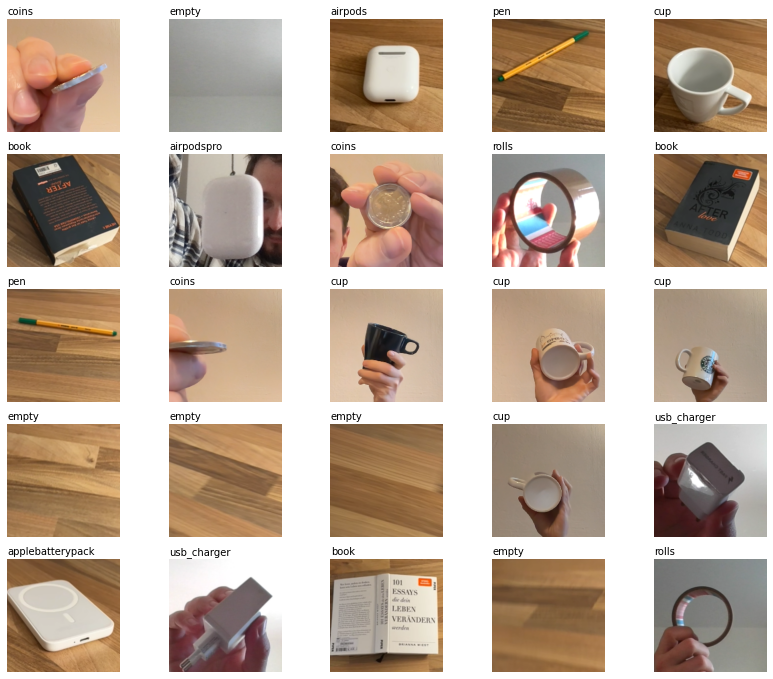

In [6]:
# set figure size for plotly globally
plt.rcParams['figure.figsize'] = [14, 12]

# plot a number of images with their labels
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.text(0, -10, y[i]) # displays y-values in each subplot

In [6]:
# binarize labels

# encode string labels to ordinals
le = LabelEncoder()
y = le.fit_transform(y)
# transform ordinals to one-hot
y = to_categorical(y)
X.shape, y.shape

((1503, 224, 224, 3), (1503, 12))

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [2]:
### define CNN model

# clear session to clean compiler (important)
K.clear_session()

# add layers
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), strides=(2, 2),
           padding="same", activation="relu",
           input_shape=(224, 224, 3)),
    
    Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
           padding="same", activation="relu",
           ),
    
    
    Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
           padding="same", activation="relu",
           ),


    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"),
    
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"),
    
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"),

    BatchNormalization(),
    
    Flatten(),

    Dense(units = 96, activation = 'relu'),
    
    #Dropout(0.2),
    
    Dense(units = 48, activation = 'relu'),
    
    Dense(units = 24, activation = 'relu'),
    
    #BatchNormalization(),
        
    Dropout(0.2),
    
    Dense(units = 12, activation = 'softmax')
    ])

In [3]:
# compile model
model.compile(optimizer = "Adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

In [10]:
# view summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [54]:
# define early stopping callback to be used in model.fit method
early_stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', #the thing we are monitoring
    min_delta = 0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience = 10, #number of epochs with no improvement needed for the model to stop
    verbose = 1, #0 is silent, 1 means a message is displayed when something happens
    mode = 'auto',
    restore_best_weights=True
    #Bonus Exercise! More things to look up in the documentation:
    #restore_best_weights
    #baseline
)

In [64]:
# fit the model
hist1 = model.fit(X_train, y_train,
                 epochs = 100, # 1 epoch is 1 iteration over entire X and y data
                 batch_size = 100, # number of samples per gradient update
                 validation_split = 0.2),
                 callbacks = [early_stop]
                )

Epoch 1/100
10/10 [==============================] - 21s 2s/step - loss: 2.6268 - accuracy: 0.1967 - val_loss: 4.9563 - val_accuracy: 0.1120
Epoch 2/100
10/10 [==============================] - 15s 1s/step - loss: 2.1463 - accuracy: 0.2581 - val_loss: 5.6728 - val_accuracy: 0.2324
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 1.8444 - accuracy: 0.3871 - val_loss: 4.3042 - val_accuracy: 0.2739
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 1.6792 - accuracy: 0.4475 - val_loss: 4.5068 - val_accuracy: 0.0788
Epoch 5/100
10/10 [==============================] - 13s 1s/step - loss: 1.5469 - accuracy: 0.4849 - val_loss: 3.9209 - val_accuracy: 0.2199
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 1.3872 - accuracy: 0.5380 - val_loss: 5.0306 - val_accuracy: 0.0913
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 1.2118 - accuracy: 0.5994 - val_loss: 3.2708 - val_accuracy: 0.1162
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 13s 1s/step - loss: 0.1109 - accuracy: 0.9646 - val_loss: 1.4665 - val_accuracy: 0.6598
Epoch 60/100
10/10 [==============================] - 13s 1s/step - loss: 0.1114 - accuracy: 0.9646 - val_loss: 0.7705 - val_accuracy: 0.8299
Epoch 61/100
10/10 [==============================] - 13s 1s/step - loss: 0.0979 - accuracy: 0.9677 - val_loss: 0.6513 - val_accuracy: 0.8672
Epoch 62/100
10/10 [==============================] - 13s 1s/step - loss: 0.0833 - accuracy: 0.9688 - val_loss: 0.8064 - val_accuracy: 0.8589
Epoch 63/100
10/10 [==============================] - 13s 1s/step - loss: 0.1052 - accuracy: 0.9615 - val_loss: 1.2822 - val_accuracy: 0.8050
Epoch 64/100
10/10 [==============================] - 13s 1s/step - loss: 0.1407 - accuracy: 0.9594 - val_loss: 1.4560 - val_accuracy: 0.7427
Epoch 65/100
10/10 [==============================] - 13s 1s/step - loss: 0.1137 - accuracy: 0.9573 - val_loss: 1.9762 - val_accuracy: 0.7261
Epoch 

In [11]:
# load checkpoints from prior training
model.load_weights('../models/checkpoint_friday')

# save checkpoint
#path = 'episode '+ str(ep) + ' checkpoint'
#model.save_weights(path)

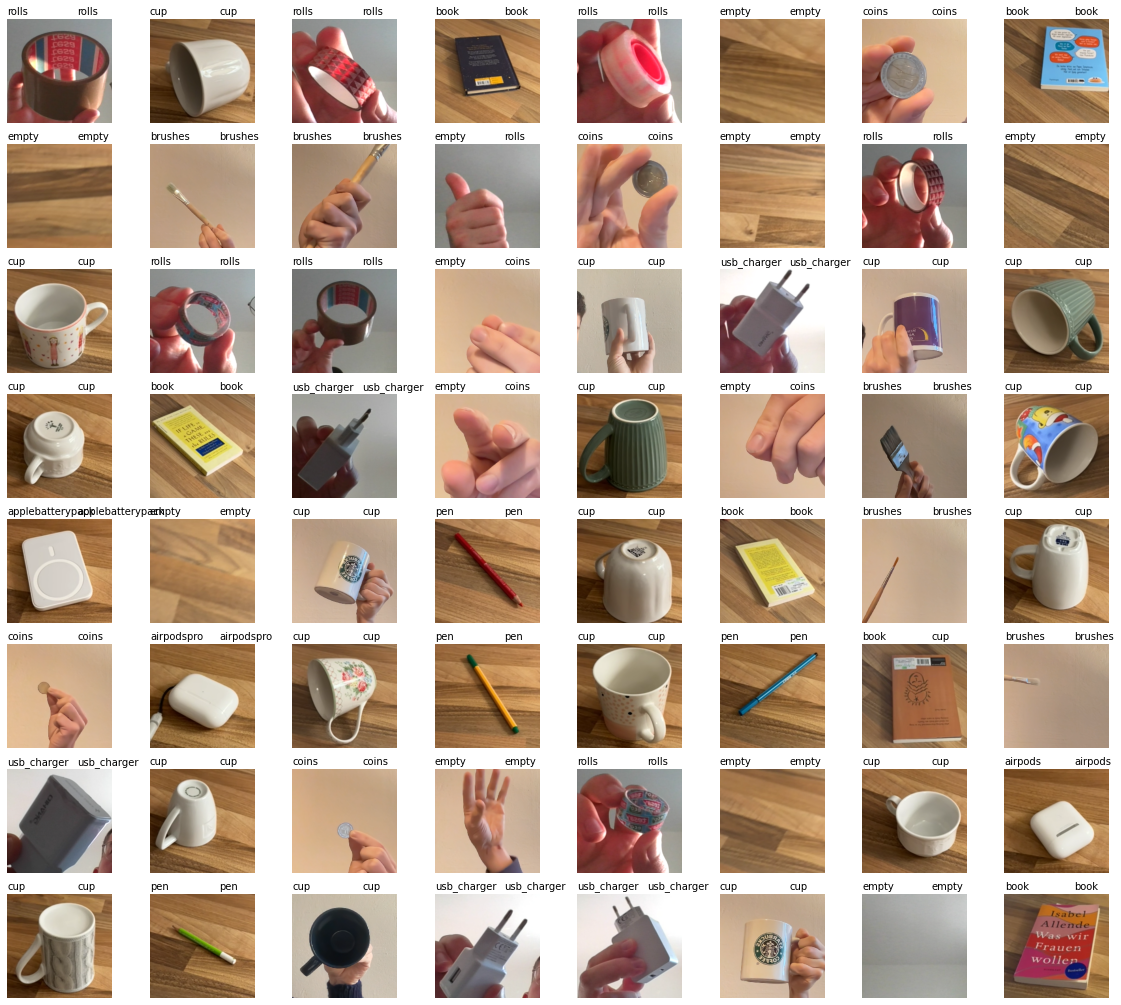

In [12]:
# plot a bunch of images with their real labels and the predicted labels

# set figure size globally
plt.rcParams['figure.figsize'] = [20, 18]

size = 8
offset = 100
cls = np.array(classes)

for i in range(size*size):
    plt.subplot(size, size, i+1)
    plt.imshow(X_test[i+offset])
    plt.axis('off')
        
    binary = np.array(np.rint(y_test[i+offset]), dtype='bool')
    binary = np.reshape(binary, (12))
    if cls[binary]:
        true = cls[binary][0]
    else:
        true = 'none'
    plt.text(0, -10, true) # displays y-values in each subplot
        
    binary = np.array(np.rint(model.predict(X_test[i+offset:i+1+offset,:,:,:], verbose=0)), dtype='bool')
    binary = np.reshape(binary, (12))
    if cls[binary]:
        pred = cls[binary][0]
    else:
        pred = 'none'
    plt.text(150, -10, pred)

In [13]:
import sys
import logging
import os
import cv2
from utils import write_image, key_action, init_cam


In [21]:
# check model for fitness with live-webcam images of the same objects (press space bar to make a prediction)

cls = np.array(classes)

webcam = init_cam(640, 480)
key = None

try:
    # q key not pressed 
    while key != 'q':
        # Capture frame-by-frame
        ret, frame = webcam.read()
        # fliping the image 
        frame = cv2.flip(frame, 1)
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #frame = np.expand_dims(frame, 2)
        # draw a [224x224] rectangle into the frame, leave some space for the black border 
        offset = 2
        width = 224
        x = 160
        y = 120
        cv2.rectangle(img=frame, 
                      pt1=(x-offset,y-offset), 
                      pt2=(x+width+offset, y+width+offset), 
                      color=(0, 0, 0), 
                      thickness=2
        )     

        # get key event
        key = key_action()

        if key == 'space':
            # write the image without overlay
            # extract the [224x224] rectangle out of it
            image = frame[y:y+width, x:x+width, :]
            prediction = model.predict(np.expand_dims(image, 0))
            prediction = np.floor(prediction/np.max(prediction))
            binary = np.array(prediction, dtype='bool')
            binary = np.reshape(binary, (12))
            if cls[binary]:
                pred = cls[binary][0]
            else:
                pred = 'none'
            print(pred)

        # disable ugly toolbar
        cv2.namedWindow('frame', flags=cv2.WINDOW_GUI_NORMAL)              

        # display the resulting frame
        cv2.imshow('frame', frame)            

finally:
    # when everything done, release the capture
    logging.info('quit webcam')
    webcam.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 73ms/step
empty
1/1 [==============================] - 0s 99ms/step
empty
1/1 [==============================] - 0s 49ms/step
usb_charger
